# Predicting the Number of People Displaced Based on Disasters

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
import re

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier

In [2]:
df = pd.read_csv("/Users/eleanorsalm/Downloads/IDMC_GIDD_disasters_internal_displacement_data_2021-1653258563433.csv")
                
                
                

In [3]:
df

,ISO3,Country / Territory,Year,Event Name,Date of event (start),Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type
0,AB9,Abyei Area,2018,Abyie: Flood - 01/07/2018,2018-07-01T00:00:00Z,2,Weather related,Flood,Flood
1,AB9,Abyei Area,2019,Abyei: Flood - southern parts - 01/06/2019,2019-06-01T00:00:00Z,40000,Weather related,Flood,Flood
2,AFG,Afghanistan,2008,NaN,2008-04-17T00:00:00Z,3000,Geophysical,Earthquake,Earthquake
3,AFG,Afghanistan,2008,NaN,2008-08-01T00:00:00Z,200,Weather related,Flood,Flood
4,AFG,Afghanistan,2009,NaN,2009-01-01T00:00:00Z,3000,Geophysical,Earthquake,Earthquake
...,...,...,...,...,...,...,...,...,...
11135,ZWE,Zimbabwe,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",2021-01-19T00:00:00Z,100,Weather related,Storm,"Storm, Tropical, Cyclone"
11136,ZWE,Zimbabwe,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",2021-01-19T00:00:00Z,1000,Weather related,Storm,"Storm, Tropical, Cyclone"
11137,ZWE,Zimbabwe,2021,Zimbabwe: Hailstorm - Manicaland (Mutare Rural...,2021-11-01T00:00:00Z,300,Weather related,Storm,Hailstorm
11138,ZWE,Zimbabwe,2021,Zimbabwe: Storms - Manicaland (Buhera - Zibute...,2021-12-01T00:00:00Z,80,Weather related,Storm,Storm


In [4]:
countryList = list(df['Country / Territory'])

c = pd.Series(countryList).value_counts().to_dict()
c['Afghanistan']                 

302

In [5]:
country_val_counts = pd.Series(df["Country / Territory"]).value_counts().to_dict()

out_c = list()

In [6]:
x = list(country_val_counts.keys())
y = list(country_val_counts.values())
for i in range(len(country_val_counts)):
    if y[i] > 10:
        out_c.append(x[i])
print('Afghanistan' in out_c)


True


In [7]:
len(out_c)

111

In [8]:
#deleting all the ones that have less than 5 counts 
country_names = list(df["Country / Territory"])


rows_to_drop = list()
for i in range(len(country_names)):
    print(country_names == None)
    if country_names[i]!= None and not (country_names[i] in out_c):
        rows_to_drop.append(i)
df = df.drop(index=rows_to_drop).reset_index(drop = True)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [9]:
df

,ISO3,Country / Territory,Year,Event Name,Date of event (start),Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type
0,AFG,Afghanistan,2008,NaN,2008-04-17T00:00:00Z,3000,Geophysical,Earthquake,Earthquake
1,AFG,Afghanistan,2008,NaN,2008-08-01T00:00:00Z,200,Weather related,Flood,Flood
2,AFG,Afghanistan,2009,NaN,2009-01-01T00:00:00Z,3000,Geophysical,Earthquake,Earthquake
3,AFG,Afghanistan,2009,2009-000080,2009-01-01T00:00:00Z,25000,Weather related,Flood,Flood
4,AFG,Afghanistan,2010,NaN,2010-01-01T00:00:00Z,1000,Geophysical,Earthquake,Earthquake
...,...,...,...,...,...,...,...,...,...
10717,ZWE,Zimbabwe,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",2021-01-19T00:00:00Z,100,Weather related,Storm,"Storm, Tropical, Cyclone"
10718,ZWE,Zimbabwe,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",2021-01-19T00:00:00Z,1000,Weather related,Storm,"Storm, Tropical, Cyclone"
10719,ZWE,Zimbabwe,2021,Zimbabwe: Hailstorm - Manicaland (Mutare Rural...,2021-11-01T00:00:00Z,300,Weather related,Storm,Hailstorm
10720,ZWE,Zimbabwe,2021,Zimbabwe: Storms - Manicaland (Buhera - Zibute...,2021-12-01T00:00:00Z,80,Weather related,Storm,Storm


In [10]:
pd.Series(list(df['Country / Territory'])).value_counts().to_dict().keys()

dict_keys(['Indonesia', 'United States', 'Colombia', 'China', 'Philippines', 'Sri Lanka', 'Afghanistan', 'Malaysia', 'Myanmar', 'Nepal', 'Viet Nam', 'India', 'Burundi', 'Peru', 'Canada', 'Brazil', 'Cambodia', 'Dem. Rep. Congo', 'Nigeria', 'Mexico', 'Australia', 'Uganda', 'Timor-Leste', 'France', 'Thailand', 'Bangladesh', 'Argentina', 'Pakistan', 'Japan', 'Italy', 'Chile', 'New Zealand', 'South Sudan', 'Ethiopia', 'Ghana', 'Spain', 'Iran', 'Kenya', 'Angola', 'Ecuador', 'Guatemala', 'Malawi', 'Central African Republic', 'United Kingdom', 'Somalia', 'Papua New Guinea', 'Korea', 'Dominican Republic', 'Tanzania', 'Bolivia', 'Russia', 'South Africa', 'Turkey', 'Zimbabwe', 'Costa Rica', 'Taiwan, China', 'Greece', 'Nicaragua', 'Haiti', 'Honduras', 'Madagascar', 'Rwanda', 'Mozambique', 'Chad', 'El Salvador', 'Uruguay', 'Fiji', 'Panama', 'Zambia', 'Yemen', 'Sudan', 'Tajikistan', 'Cuba', 'Portugal', 'Algeria', 'Albania', 'Norway', 'Israel', 'Venezuela', 'Niger', 'Paraguay', 'Lao PDR', 'Vanuatu', 

<AxesSubplot:>

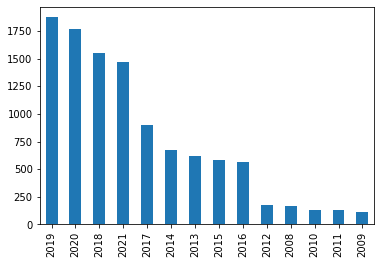

In [11]:
pd.Series(df.Year).value_counts().plot.bar()

In [12]:
#take 2019, 2020, 2018, 2021, and 2017 

In [13]:
#deleting all the ones that have less than 5 counts 
years = list(df["Year"])
out_c = [2019, 2020, 2018, 2021,2017]

rows_to_drop = list()
for i in range(len(years)):
    if years[i]!= None and not (years[i] in out_c):
        rows_to_drop.append(i)
df = df.drop(index=rows_to_drop).reset_index(drop=True)

In [14]:
df[0:60]

,ISO3,Country / Territory,Year,Event Name,Date of event (start),Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type
0,AFG,Afghanistan,2017,Afghanistan: flood - Nimroz - 23/03/2017,2017-03-23T00:00:00Z,500,Weather related,Flood,Flood
1,AFG,Afghanistan,2017,Afghanistan: heavy rainfall and flood - Badakh...,2017-03-27T00:00:00Z,100,Weather related,Flood,Flood
2,AFG,Afghanistan,2017,Afghanistan: landslide - Ghazni - 04/03/2017,2017-03-04T00:00:00Z,7,Weather related,Wet Mass Movement,"Landslide, Avalanche"
3,AFG,Afghanistan,2017,Afghanistan: avalanche - Bamyan - 23/02/2017,2017-03-23T00:00:00Z,7,Weather related,Flood,Flood
4,AFG,Afghanistan,2017,Afghanistan: avalanche - Daykundi - 03/02/2017,2017-02-03T00:00:00Z,200,Weather related,Wet Mass Movement,"Landslide, Avalanche"
5,AFG,Afghanistan,2017,Afghanistan: flood - Paktya - 15/05/2017,2017-05-15T00:00:00Z,81,Weather related,Flood,Flood
6,AFG,Afghanistan,2017,Afghanistan: severe winter conditions - Kapisa...,2017-02-03T00:00:00Z,800,Weather related,Extreme temperature,"Exterme temp, Severe winter conditions"
7,AFG,Afghanistan,2017,Afghanistan: avalanche - Nuristan - 05/02/2017,2017-02-05T00:00:00Z,600,Weather related,Wet Mass Movement,"Landslide, Avalanche"
8,AFG,Afghanistan,2017,Afghanistan: flood - Samangan - 06/05/2017,2017-05-06T00:00:00Z,100,Weather related,Flood,Flood
9,AFG,Afghanistan,2017,Afghanistan: heavy rainfall - Herat - 03/02/2017,2017-02-03T00:00:00Z,81,Weather related,Flood,Flood


In [15]:
#fix the date so it looks purty
l = list(df["Date of event (start)"])
l2 = list()


[l2.append(int(ele.split('-')[1])) for ele in l]

l2

[3,
 3,
 3,
 3,
 2,
 5,
 2,
 2,
 5,
 2,
 11,
 5,
 7,
 2,
 3,
 4,
 11,
 2,
 2,
 6,
 2,
 9,
 8,
 2,
 1,
 2,
 2,
 4,
 4,
 2,
 4,
 2,
 2,
 4,
 2,
 2,
 5,
 5,
 1,
 4,
 7,
 2,
 7,
 12,
 7,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 4,
 4,
 1,
 9,
 8,
 5,
 5,
 6,
 2,
 2,
 5,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 7,
 4,
 8,
 11,
 10,
 9,
 9,
 8,
 7,
 7,
 7,
 4,
 7,
 7,
 6,
 11,
 11,
 5,
 7,
 4,
 4,
 6,
 4,
 4,
 4,
 2,
 7,
 4,
 4,
 4,
 3,
 5,
 3,
 3,
 3,
 2,
 2,
 7,
 5,
 7,
 11,
 4,
 2,
 11,
 2,
 1,
 3,
 2,
 2,
 10,
 1,
 2,
 5,
 5,
 3,
 3,
 4,
 4,
 7,
 4,
 4,
 3,
 6,
 3,
 4,
 3,
 2,
 3,
 10,
 8,
 3,
 10,
 4,
 2,
 4,
 4,
 5,
 5,
 4,
 4,
 8,
 4,
 7,
 5,
 5,
 5,
 4,
 6,
 6,
 10,
 5,
 6,
 9,
 5,
 7,
 8,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 11,
 8,
 7,
 1,
 12,
 11,
 12,
 4,
 3,
 5,
 7,
 10,
 8,
 4,
 4,
 2,
 7,
 2,
 2,
 1,
 5,
 5,
 5,
 3,
 7,
 3,
 4,
 3,
 8,
 4,
 5,
 5,
 5,
 5,
 5,
 9,
 4,
 5,
 7,
 7,
 5,
 5,
 4,
 3,
 9,
 3,
 7,
 4,
 4,
 3,
 5,
 4,
 3,
 3,
 7,
 5,
 3,
 5,
 2,
 3,
 4,
 3

In [16]:
df['Month'] = l2
df

,ISO3,Country / Territory,Year,Event Name,Date of event (start),Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,Month
0,AFG,Afghanistan,2017,Afghanistan: flood - Nimroz - 23/03/2017,2017-03-23T00:00:00Z,500,Weather related,Flood,Flood,3
1,AFG,Afghanistan,2017,Afghanistan: heavy rainfall and flood - Badakh...,2017-03-27T00:00:00Z,100,Weather related,Flood,Flood,3
2,AFG,Afghanistan,2017,Afghanistan: landslide - Ghazni - 04/03/2017,2017-03-04T00:00:00Z,7,Weather related,Wet Mass Movement,"Landslide, Avalanche",3
3,AFG,Afghanistan,2017,Afghanistan: avalanche - Bamyan - 23/02/2017,2017-03-23T00:00:00Z,7,Weather related,Flood,Flood,3
4,AFG,Afghanistan,2017,Afghanistan: avalanche - Daykundi - 03/02/2017,2017-02-03T00:00:00Z,200,Weather related,Wet Mass Movement,"Landslide, Avalanche",2
...,...,...,...,...,...,...,...,...,...,...
7553,ZWE,Zimbabwe,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",2021-01-19T00:00:00Z,100,Weather related,Storm,"Storm, Tropical, Cyclone",1
7554,ZWE,Zimbabwe,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",2021-01-19T00:00:00Z,1000,Weather related,Storm,"Storm, Tropical, Cyclone",1
7555,ZWE,Zimbabwe,2021,Zimbabwe: Hailstorm - Manicaland (Mutare Rural...,2021-11-01T00:00:00Z,300,Weather related,Storm,Hailstorm,11
7556,ZWE,Zimbabwe,2021,Zimbabwe: Storms - Manicaland (Buhera - Zibute...,2021-12-01T00:00:00Z,80,Weather related,Storm,Storm,12


hazard category (either weather related or geophysical -> ohe), hazard type (10 types), hazard sub-type (43)
- presumable we don't need all of these => try ohe on least to most specific, see what works best 

In [17]:
haz_cat = list(df['Hazard Category'])
pd.Series(haz_cat).value_counts()

Weather related    7175
Geophysical         380
dtype: int64

In [18]:
haz_type = list(df['Hazard Type'])
pd.Series(haz_type).value_counts()

Flood                  3429
Storm                  2163
Wet Mass Movement       746
Wildfire                730
Earthquake              212
Dry mass movement       116
Extreme temperature      65
Volcanic eruption        46
Drought                  42
Mass movement             6
dtype: int64

In [19]:
haz_subtype = list(df['Hazard Sub Type'])
len(pd.Series(haz_subtype).value_counts())

43

In [20]:
did = list(df['Disaster Internal Displacements'])
median_did = sorted(did)
median_did = median_did[int(len(did)/2)]
mean_did = sum(did)/len(did)
print(median_did)
print(mean_did) 

200
15134.613654405928


In [21]:
did = list(df['Disaster Internal Displacements'])

sum(sorted(did))/len(did)

15134.613654405928

Options for next steps pertaining to country/year issue
1. splitting up the years 
2. splitting up the countries
3. averaging the total displacements
4. adding the total displacements 
5. labeling each country with a number (aka ohe it)


# THIS IS WHERE DF IS THE DF WE ALL KNOW AND LOVE 

In [20]:
len(pd.Series(list(df['Country / Territory'])).value_counts())

111

In [21]:
le = LabelEncoder()
df['country_n'] = le.fit_transform(df['Country / Territory'])
df_n = df.drop(['Country / Territory', 'ISO3', 'Date of event (start)'], axis = 'columns')
df_n

,Year,Event Name,Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,country_n
0,2017,Afghanistan: flood - Nimroz - 23/03/2017,500,Weather related,Flood,Flood,0
1,2017,Afghanistan: heavy rainfall and flood - Badakh...,100,Weather related,Flood,Flood,0
2,2017,Afghanistan: landslide - Ghazni - 04/03/2017,7,Weather related,Wet Mass Movement,"Landslide, Avalanche",0
3,2017,Afghanistan: avalanche - Bamyan - 23/02/2017,7,Weather related,Flood,Flood,0
4,2017,Afghanistan: avalanche - Daykundi - 03/02/2017,200,Weather related,Wet Mass Movement,"Landslide, Avalanche",0
...,...,...,...,...,...,...,...
7553,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",100,Weather related,Storm,"Storm, Tropical, Cyclone",110
7554,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",1000,Weather related,Storm,"Storm, Tropical, Cyclone",110
7555,2021,Zimbabwe: Hailstorm - Manicaland (Mutare Rural...,300,Weather related,Storm,Hailstorm,110
7556,2021,Zimbabwe: Storms - Manicaland (Buhera - Zibute...,80,Weather related,Storm,Storm,110


In [22]:
pd.pivot_table(df, index = "Year", values=['Month', 'country_n', 'Disaster Internal Displacements'])

KeyError: 'Month'

In [23]:
#Label encoding year
le = LabelEncoder()
df_n['year'] = le.fit_transform(df['Year'])
df_n2 = df_n.drop(['Year', 'Event Name'], axis = 'columns')
df_n2

,Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,country_n,year
0,500,Weather related,Flood,Flood,0,0
1,100,Weather related,Flood,Flood,0,0
2,7,Weather related,Wet Mass Movement,"Landslide, Avalanche",0,0
3,7,Weather related,Flood,Flood,0,0
4,200,Weather related,Wet Mass Movement,"Landslide, Avalanche",0,0
...,...,...,...,...,...,...
7553,100,Weather related,Storm,"Storm, Tropical, Cyclone",110,4
7554,1000,Weather related,Storm,"Storm, Tropical, Cyclone",110,4
7555,300,Weather related,Storm,Hailstorm,110,4
7556,80,Weather related,Storm,Storm,110,4


NOTE: we drop Event Name here. We might need it later; just making a basline model

## Using Hazard Category to Predict Disaster Internal Displacements

In [24]:
#dropping hazard type and subtype
df_category = df_n2.drop(['Hazard Type', 'Hazard Sub Type'], axis = 'columns')
df_category

,Disaster Internal Displacements,Hazard Category,country_n,year
0,500,Weather related,0,0
1,100,Weather related,0,0
2,7,Weather related,0,0
3,7,Weather related,0,0
4,200,Weather related,0,0
...,...,...,...,...
7553,100,Weather related,110,4
7554,1000,Weather related,110,4
7555,300,Weather related,110,4
7556,80,Weather related,110,4


In [27]:
le = LabelEncoder()
df_n['year'] = le.fit_transform(df['Year'])
df_n2 = df_n.drop(['Year', 'Event Name'], axis = 'columns')
df_n2

,Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,Month,country_n,year
0,500,Weather related,Flood,Flood,3,0,0
1,100,Weather related,Flood,Flood,3,0,0
2,7,Weather related,Wet Mass Movement,"Landslide, Avalanche",3,0,0
3,7,Weather related,Flood,Flood,3,0,0
4,200,Weather related,Wet Mass Movement,"Landslide, Avalanche",2,0,0
...,...,...,...,...,...,...,...
7553,100,Weather related,Storm,"Storm, Tropical, Cyclone",1,110,4
7554,1000,Weather related,Storm,"Storm, Tropical, Cyclone",1,110,4
7555,300,Weather related,Storm,Hailstorm,11,110,4
7556,80,Weather related,Storm,Storm,12,110,4


In [28]:
# on hazard category
df_category = df_n2.drop(['Hazard Type', 'Hazard Sub Type'], axis = 'columns')
df_category['Hazard Category']


0       Weather related
1       Weather related
2       Weather related
3       Weather related
4       Weather related
             ...       
7553    Weather related
7554    Weather related
7555    Weather related
7556    Weather related
7557    Weather related
Name: Hazard Category, Length: 7558, dtype: object

In [29]:
le = LabelEncoder()
df_category.dropna(subset=['Hazard Category'])
haz_cat = list(df_category['Hazard Category'])
indeces_to_drop = list()
for i in range(len(haz_cat)):
    if type(haz_cat[i]) != str:
        indeces_to_drop.append(i)

df_category = df_category.drop(indeces_to_drop)


df_category['Category'] = le.fit_transform(df_category[['Hazard Category']])
df_category = df_category.drop('Hazard Category', axis = 'columns')

df_category

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Disaster Internal Displacements,Month,country_n,year,Category
0,500,3,0,0,1
1,100,3,0,0,1
2,7,3,0,0,1
3,7,3,0,0,1
4,200,2,0,0,1
...,...,...,...,...,...
7553,100,1,110,4,1
7554,1000,1,110,4,1
7555,300,11,110,4,1
7556,80,12,110,4,1


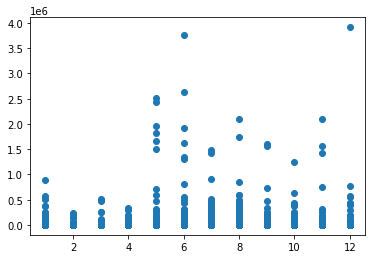

In [30]:
y = list(df_category['Disaster Internal Displacements'])
x = list(df_category['Month'])
plt.scatter(x, y)

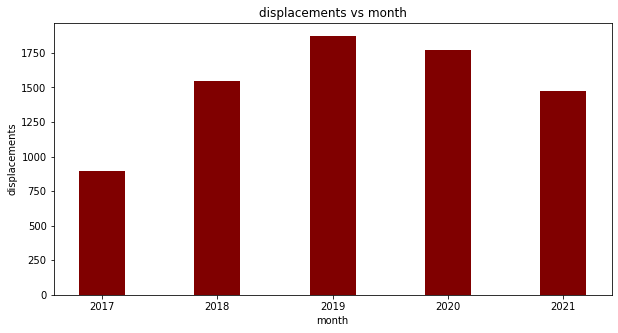

In [31]:


import numpy as np
import matplotlib.pyplot as plt
 

data = pd.Series(df['Year']).value_counts().to_dict()
month = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(month, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("month")
plt.ylabel("displacements")
plt.title("displacements vs month")
plt.show()

In [32]:
X = df_category[['Category', 'Month', 'country_n']]
y = df_category['Disaster Internal Displacements']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [33]:
model = LinearRegression()
model.fit(train_cat[['Category', 'Month', 'country_n', 'year']], train_cat['Disaster Internal Displacements'])
scores = cross_val_score(model, test_cat[['Category', 'Month', 'country_n', 'year']], test_cat['Disaster Internal Displacements'])
scores.mean()

NameError: name 'train_cat' is not defined

In [34]:
model = DecisionTreeClassifier()
model.fit(train_cat[['Category', 'Month', 'country_n', 'year']], train_cat['Disaster Internal Displacements'])
scores = cross_val_score(model, test_cat[['Category', 'Month', 'country_n', 'year']], test_cat['Disaster Internal Displacements'])
scores.mean()


NameError: name 'train_cat' is not defined

In [35]:
model2 = XGBRegressor()
model2.fit(X_train, y_train)
scores = cross_val_score(model2, X_test, y_test, cv = 2)
scores

array([-0.40310351, -1.995963  ])

In [36]:
model3 = GradientBoostingRegressor(min_samples_split=5, min_samples_leaf=3, max_depth=4, min_impurity_decrease=0.5, init=None, random_state=42, alpha=0.9, tol=10, 
                                   loss='huber', n_estimators=100, learning_rate=0.2, criterion='mse' )
model3.fit(X_train, y_train)
scores = cross_val_score(model3,X_test,y_test)
scores.mean()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:542: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:3

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

-0.011337762482605918

In [37]:
model4 = GradientBoostingRegressor()
model4.fit(X_train, y_train)
mse = mean_squared_error(y_test, model4.predict(X_test))
mse

21399390728.923077

In [38]:
df_n2

,Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,Month,country_n,year
0,500,Weather related,Flood,Flood,3,0,0
1,100,Weather related,Flood,Flood,3,0,0
2,7,Weather related,Wet Mass Movement,"Landslide, Avalanche",3,0,0
3,7,Weather related,Flood,Flood,3,0,0
4,200,Weather related,Wet Mass Movement,"Landslide, Avalanche",2,0,0
...,...,...,...,...,...,...,...
7553,100,Weather related,Storm,"Storm, Tropical, Cyclone",1,110,4
7554,1000,Weather related,Storm,"Storm, Tropical, Cyclone",1,110,4
7555,300,Weather related,Storm,Hailstorm,11,110,4
7556,80,Weather related,Storm,Storm,12,110,4


In [39]:
df_type = df_n2.drop(['Hazard Category', 'Hazard Sub Type'], axis = 'columns')
df_type

,Disaster Internal Displacements,Hazard Type,Month,country_n,year
0,500,Flood,3,0,0
1,100,Flood,3,0,0
2,7,Wet Mass Movement,3,0,0
3,7,Flood,3,0,0
4,200,Wet Mass Movement,2,0,0
...,...,...,...,...,...
7553,100,Storm,1,110,4
7554,1000,Storm,1,110,4
7555,300,Storm,11,110,4
7556,80,Storm,12,110,4


In [40]:
df_type = df_type.drop('haz_type', axis='columns')
df_type

KeyError: "['haz_type'] not found in axis"

In [41]:
le = LabelEncoder()
df_type['type'] = le.fit_transform(list(df_type['Hazard Type']))
df_type = df_type.drop('Hazard Type', axis = 'columns')

In [42]:
df_type

,Disaster Internal Displacements,Month,country_n,year,type
0,500,3,0,0,4
1,100,3,0,0,4
2,7,3,0,0,8
3,7,3,0,0,4
4,200,2,0,0,8
...,...,...,...,...,...
7553,100,1,110,4,6
7554,1000,1,110,4,6
7555,300,11,110,4,6
7556,80,12,110,4,6


In [43]:
X = df_type[['Month', 'country_n', 'type', 'year']]
y = df_type['Disaster Internal Displacements']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_test, y_test)
scores.mean()

-0.009288992030517562

In [45]:
model2 = XGBRegressor()
model2.fit(X_train, y_train)
scores = cross_val_score(model2, X_test, y_test, cv = 2)
scores

array([-0.16920617, -4.19122176])

In [46]:
#I think label encoder isn't working becausing 1 and 2 aren't related -> maybe use one hot encoder?

In [47]:
dfx = df_n2.drop('Hazard Category', axis='columns')
dfx

,Disaster Internal Displacements,Hazard Type,Hazard Sub Type,Month,country_n,year
0,500,Flood,Flood,3,0,0
1,100,Flood,Flood,3,0,0
2,7,Wet Mass Movement,"Landslide, Avalanche",3,0,0
3,7,Flood,Flood,3,0,0
4,200,Wet Mass Movement,"Landslide, Avalanche",2,0,0
...,...,...,...,...,...,...
7553,100,Storm,"Storm, Tropical, Cyclone",1,110,4
7554,1000,Storm,"Storm, Tropical, Cyclone",1,110,4
7555,300,Storm,Hailstorm,11,110,4
7556,80,Storm,Storm,12,110,4


In [48]:
st = list(dfx['Hazard Sub Type'])
st_vc = pd.Series(st).value_counts().to_dict()
st_keys = list(st_vc.keys())
st_values = list(st_vc.values())

st_c = list()

for i in range(len(st)):
    if st[i] in st_keys:
        st_c.append(st_vc[st[i]])
        
indeces_to_drop = list()
for i in range(len(st)):
    if type(st[i]) != str:
        indeces_to_drop.append(i)
dfx = dfx.drop(indeces_to_drop)

dfx['haz_stc'] = st_c

dfx

,Disaster Internal Displacements,Hazard Type,Hazard Sub Type,Month,country_n,year,haz_stc
0,500,Flood,Flood,3,0,0,2735
1,100,Flood,Flood,3,0,0,2735
2,7,Wet Mass Movement,"Landslide, Avalanche",3,0,0,573
3,7,Flood,Flood,3,0,0,2735
4,200,Wet Mass Movement,"Landslide, Avalanche",2,0,0,573
...,...,...,...,...,...,...,...
7553,100,Storm,"Storm, Tropical, Cyclone",1,110,4,154
7554,1000,Storm,"Storm, Tropical, Cyclone",1,110,4,154
7555,300,Storm,Hailstorm,11,110,4,48
7556,80,Storm,Storm,12,110,4,1314


In [49]:
dfx = dfx.drop(['Hazard Type', 'Hazard Sub Type'], axis = 'columns')

In [50]:
dfx

,Disaster Internal Displacements,Month,country_n,year,haz_stc
0,500,3,0,0,2735
1,100,3,0,0,2735
2,7,3,0,0,573
3,7,3,0,0,2735
4,200,2,0,0,573
...,...,...,...,...,...
7553,100,1,110,4,154
7554,1000,1,110,4,154
7555,300,11,110,4,48
7556,80,12,110,4,1314


In [51]:
X = dfx[['Month', 'country_n', 'year', 'haz_stc']]
y = dfx['Disaster Internal Displacements']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)
scores = cross_val_score(model, X_test, y_test)
scores.mean()

-0.0195083165037367

In [53]:
df

#converting df to new csv so that I can see what needs to be added and potentially add it

df.to_csv('DID_edit.csv', index=False)

## Afghanistan Koppen Classification

In [54]:
afg_kc = pd.read_csv('world_afg.csv')
afg_kc = afg_kc.loc[afg_kc['name'] == 'Afghanistan']
afg_kc = afg_kc.drop(columns=['Unnamed: 0'])
afg_kc = afg_kc.drop(103)
afg_kc = afg_kc.reset_index().drop(columns='index')
afg_kc

FileNotFoundError: [Errno 2] No such file or directory: 'world_afg.csv'

In [55]:
afg_kc = afg_kc[0:34]
afg_kc

NameError: name 'afg_kc' is not defined

## Putting Koppen Classification into IMDC

In [22]:
world = pd.read_csv('world_afg_ind_usa_chn_arg_brn.csv')
world = world.drop(97).reset_index()
world = world.drop(columns=['index', 'Unnamed: 0'])
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,GRIDCODE,name2
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180 -16.06713266364245, 180 -1...",0,NaN
1,53950935.0,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,0,NaN
2,603253.0,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,0,NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84 49.00000000000011, -12...",0,NaN
4,18556698.0,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,...",0,NaN
...,...,...,...,...,...,...,...,...
460,11466756.0,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967364576122 -2.41385475710134,...",14,Muyinga
461,11466756.0,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967364576122 -2.41385475710134,...",14,Mwaro
462,11466756.0,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967364576122 -2.41385475710134,...",14,Ngozi
463,11466756.0,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967364576122 -2.41385475710134,...",14,Rutana


In [23]:
df

,ISO3,Country / Territory,Year,Event Name,Date of event (start),Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,Month
0,AFG,Afghanistan,2017,Afghanistan: flood - Nimroz - 23/03/2017,2017-03-23T00:00:00Z,500,Weather related,Flood,Flood,3
1,AFG,Afghanistan,2017,Afghanistan: heavy rainfall and flood - Badakh...,2017-03-27T00:00:00Z,100,Weather related,Flood,Flood,3
2,AFG,Afghanistan,2017,Afghanistan: landslide - Ghazni - 04/03/2017,2017-03-04T00:00:00Z,7,Weather related,Wet Mass Movement,"Landslide, Avalanche",3
3,AFG,Afghanistan,2017,Afghanistan: avalanche - Bamyan - 23/02/2017,2017-03-23T00:00:00Z,7,Weather related,Flood,Flood,3
4,AFG,Afghanistan,2017,Afghanistan: avalanche - Daykundi - 03/02/2017,2017-02-03T00:00:00Z,200,Weather related,Wet Mass Movement,"Landslide, Avalanche",2
...,...,...,...,...,...,...,...,...,...,...
7553,ZWE,Zimbabwe,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",2021-01-19T00:00:00Z,100,Weather related,Storm,"Storm, Tropical, Cyclone",1
7554,ZWE,Zimbabwe,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",2021-01-19T00:00:00Z,1000,Weather related,Storm,"Storm, Tropical, Cyclone",1
7555,ZWE,Zimbabwe,2021,Zimbabwe: Hailstorm - Manicaland (Mutare Rural...,2021-11-01T00:00:00Z,300,Weather related,Storm,Hailstorm,11
7556,ZWE,Zimbabwe,2021,Zimbabwe: Storms - Manicaland (Buhera - Zibute...,2021-12-01T00:00:00Z,80,Weather related,Storm,Storm,12


In [24]:
afg = df.loc[df['Country / Territory'] == 'Afghanistan']
usa = df.loc[df['Country / Territory'] == 'United States']
ind = df.loc[df['Country / Territory'] == 'India']
chn = df.loc[df['Country / Territory'] == 'China']
arg = df.loc[df['Country / Territory'] == 'Argentina']
bnd = df.loc[df['Country / Territory'] == 'Burundi']

In [25]:
countries_u = pd.DataFrame()
countries_u = countries_u.append(afg)
countries_u = countries_u.append(usa)
countries_u = countries_u.append(ind)
countries_u = countries_u.append(chn)
countries_u = countries_u.append(arg)
countries_u = countries_u.append(bnd)
countries_u = countries_u.reset_index().drop(columns=['index'])

/var/folders/4z/jclh88090qlc7lm4qlf0dkx40000gn/T/ipykernel_47413/2128913934.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countries_u = countries_u.append(afg)
/var/folders/4z/jclh88090qlc7lm4qlf0dkx40000gn/T/ipykernel_47413/2128913934.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countries_u = countries_u.append(usa)
/var/folders/4z/jclh88090qlc7lm4qlf0dkx40000gn/T/ipykernel_47413/2128913934.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countries_u = countries_u.append(ind)
/var/folders/4z/jclh88090qlc7lm4qlf0dkx40000gn/T/ipykernel_47413/2128913934.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countries_u = coun

In [29]:
countries_u['koppen'] = [0]*1883
countries_u

,ISO3,Country / Territory,Year,Event Name,Date of event (start),Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,country_n,koppen
0,AFG,Afghanistan,2017,Afghanistan: flood - Nimroz - 23/03/2017,2017-03-23T00:00:00Z,500,Weather related,Flood,Flood,0,0
1,AFG,Afghanistan,2017,Afghanistan: heavy rainfall and flood - Badakh...,2017-03-27T00:00:00Z,100,Weather related,Flood,Flood,0,0
2,AFG,Afghanistan,2017,Afghanistan: landslide - Ghazni - 04/03/2017,2017-03-04T00:00:00Z,7,Weather related,Wet Mass Movement,"Landslide, Avalanche",0,0
3,AFG,Afghanistan,2017,Afghanistan: avalanche - Bamyan - 23/02/2017,2017-03-23T00:00:00Z,7,Weather related,Flood,Flood,0,0
4,AFG,Afghanistan,2017,Afghanistan: avalanche - Daykundi - 03/02/2017,2017-02-03T00:00:00Z,200,Weather related,Wet Mass Movement,"Landslide, Avalanche",0,0
...,...,...,...,...,...,...,...,...,...,...,...
1878,BDI,Burundi,2021,Burundi: Strong Winds - Bujumbura Mairie - Mar...,2021-03-01T00:00:00Z,500,Weather related,Storm,Storm,11,0
1879,BDI,Burundi,2021,Burundi: Strong Winds - Kirundo - March 2021,2021-03-01T00:00:00Z,100,Weather related,Storm,Storm,11,0
1880,BDI,Burundi,2021,Burundi: Strong Winds - Cibitoke - March 2021,2021-03-01T00:00:00Z,200,Weather related,Storm,Storm,11,0
1881,BDI,Burundi,2021,Burundi: Strong Winds - Cankuzo - March 2021,2021-03-01T00:00:00Z,39,Weather related,Storm,Storm,11,0


In [26]:
countries_u = pd.read_csv('countries_u.csv')
countries_u

,Unnamed: 0,ISO3,Country / Territory,Year,Event Name,Date of event (start),Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,country_n,koppen
0,0,AFG,Afghanistan,2017,Afghanistan: flood - Nimroz - 23/03/2017,2017-03-23T00:00:00Z,500,Weather related,Flood,Flood,0,22.0
1,1,AFG,Afghanistan,2017,Afghanistan: heavy rainfall and flood - Badakh...,2017-03-27T00:00:00Z,100,Weather related,Flood,Flood,0,62.0
2,2,AFG,Afghanistan,2017,Afghanistan: landslide - Ghazni - 04/03/2017,2017-03-04T00:00:00Z,7,Weather related,Wet Mass Movement,"Landslide, Avalanche",0,46.0
3,3,AFG,Afghanistan,2017,Afghanistan: avalanche - Bamyan - 23/02/2017,2017-03-23T00:00:00Z,7,Weather related,Flood,Flood,0,26.0
4,4,AFG,Afghanistan,2017,Afghanistan: avalanche - Daykundi - 03/02/2017,2017-02-03T00:00:00Z,200,Weather related,Wet Mass Movement,"Landslide, Avalanche",0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1878,1878,BDI,Burundi,2021,Burundi: Strong Winds - Bujumbura Mairie - Mar...,2021-03-01T00:00:00Z,500,Weather related,Storm,Storm,11,0.0
1879,1879,BDI,Burundi,2021,Burundi: Strong Winds - Kirundo - March 2021,2021-03-01T00:00:00Z,100,Weather related,Storm,Storm,11,14.0
1880,1880,BDI,Burundi,2021,Burundi: Strong Winds - Cibitoke - March 2021,2021-03-01T00:00:00Z,200,Weather related,Storm,Storm,11,14.0
1881,1881,BDI,Burundi,2021,Burundi: Strong Winds - Cankuzo - March 2021,2021-03-01T00:00:00Z,39,Weather related,Storm,Storm,11,14.0


In [86]:
sting = 'Afghanistan: flood - Nimroz - 23/03/2017'
l = sting.split()
x = list(world.name2)
for c in l: 
    for i in range(len(x)):
        if x[i] == c :
            s = world['GRIDCODE'][i]
        

In [87]:
x = world.loc[world['iso_a3']=='AFG']
x = x.reset_index(drop =True)
x

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,GRIDCODE,name2
0,34124811.0,Asia,Afghanistan,AFG,64080.0,POLYGON Z ((65.62637329101562 32.5701637268066...,Badakhshan,62
1,34124811.0,Asia,Afghanistan,AFG,64080.0,POLYGON Z ((65.62637329101562 32.5701637268066...,Nangarhar,26
2,34124811.0,Asia,Afghanistan,AFG,64080.0,POLYGON Z ((65.62637329101562 32.5701637268066...,Paktika,26
3,34124811.0,Asia,Afghanistan,AFG,64080.0,POLYGON Z ((65.62637329101562 32.5701637268066...,Ghazni,46
4,34124811.0,Asia,Afghanistan,AFG,64080.0,POLYGON Z ((65.62637329101562 32.5701637268066...,Takhar,26
...,...,...,...,...,...,...,...,...
63,34124811.0,Asia,Afghanistan,AFG,64080.0,POLYGON Z ((65.62637329101562 32.5701637268066...,34,Badghis
64,34124811.0,Asia,Afghanistan,AFG,64080.0,POLYGON Z ((65.62637329101562 32.5701637268066...,47,Kapisa
65,34124811.0,Asia,Afghanistan,AFG,64080.0,POLYGON Z ((65.62637329101562 32.5701637268066...,22,Nimroz
66,34124811.0,Asia,Afghanistan,AFG,64080.0,POLYGON Z ((65.62637329101562 32.5701637268066...,47,Laghman


In [88]:
len(list(world.name2))

465

In [35]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,GRIDCODE,name2
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180 -16.06713266364245, 180 -1...",0,NaN
1,53950935.0,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,0,NaN
2,603253.0,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,0,NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84 49.00000000000011, -12...",0,NaN
4,18556698.0,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997033076265 49.21498078062912,...",0,NaN
...,...,...,...,...,...,...,...,...
460,11466756.0,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967364576122 -2.41385475710134,...",14,Muyinga
461,11466756.0,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967364576122 -2.41385475710134,...",14,Mwaro
462,11466756.0,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967364576122 -2.41385475710134,...",14,Ngozi
463,11466756.0,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967364576122 -2.41385475710134,...",14,Rutana


In [106]:
df[44:]

,ISO3,Country / Territory,Year,Event Name,Date of event (start),Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,country_n
44,AFG,Afghanistan,2017,Afghanistan: flood - Badakshan - 08/07/2017,2017-07-08T00:00:00Z,100,Weather related,Flood,Flood,0
45,AFG,Afghanistan,2017,Afghanistan: extreme winter conditions - Zabul...,2017-01-23T00:00:00Z,200,Weather related,Extreme temperature,"Exterme temp, Severe winter conditions",0
46,AFG,Afghanistan,2017,Afghanistan: heavy rainfall and flood - Herat ...,2017-01-23T00:00:00Z,7,Weather related,Flood,Flood,0
47,AFG,Afghanistan,2017,Afghanistan: heavy rains and floods - Kunar - ...,2017-01-04T00:00:00Z,22,Weather related,Flood,Flood,0
48,AFG,Afghanistan,2017,Afghanistan: avalanche - Badakhshan - 03/02/2017,2017-02-03T00:00:00Z,600,Weather related,Wet Mass Movement,"Landslide, Avalanche",0
...,...,...,...,...,...,...,...,...,...,...
7553,ZWE,Zimbabwe,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",2021-01-19T00:00:00Z,100,Weather related,Storm,"Storm, Tropical, Cyclone",110
7554,ZWE,Zimbabwe,2021,"Madagascar, Mozambique; Zimbabwe; South Africa...",2021-01-19T00:00:00Z,1000,Weather related,Storm,"Storm, Tropical, Cyclone",110
7555,ZWE,Zimbabwe,2021,Zimbabwe: Hailstorm - Manicaland (Mutare Rural...,2021-11-01T00:00:00Z,300,Weather related,Storm,Hailstorm,110
7556,ZWE,Zimbabwe,2021,Zimbabwe: Storms - Manicaland (Buhera - Zibute...,2021-12-01T00:00:00Z,80,Weather related,Storm,Storm,110


In [27]:

# df = pd.DataFrame()
didnt_work = list()

#this is very very very (x^3) inefficient; not rlly sure how to stop that so...yeah
def koppenDisasterAssigner():
    #goes through all countries in displacement list
    
    prev_iso = ''
    for row in range(len(countries_u)):
        # constructs a dataframe of koppen classification of only country that is being examined 
        if not (prev_iso == countries_u['ISO3'][row]):
            df_2 = world.loc[world['iso_a3'] == countries_u['ISO3'][row]]
            prev_iso = countries_u['ISO3'][row]


        name2_list = list(df_2.name2)
        gc_list = list(df_2.GRIDCODE) 
        gc_av_list = list() # list of gridcodes of provinces in event name

        # checks each word against provinces list of country 
        for word in list(re.split('\s|\(|\)', countries_u['Event Name'][row])):
            for prov_index in range(len(name2_list)):
                # if matching will add coresponding gridcode to gridcode list
                if word == name2_list[prov_index]:
                    gc_av_list.append(float(gc_list[prov_index]))

        # will manually put in a gridcode for these           
        if len(gc_av_list) == 0:
            didnt_work.append(int(row))
#             print(didnt_work)
        else:
#             print(int(gc_av_list))
            countries_u['koppen'][row] = sum(gc_av_list)/len(gc_av_list) #putts an average gridcode in for these
        
# fix so works on names w 2 words
# fix it so it work when () are wrapped around name

In [30]:
koppenDisasterAssigner()

/var/folders/4z/jclh88090qlc7lm4qlf0dkx40000gn/T/ipykernel_47413/1166662891.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_u['koppen'][row] = sum(gc_av_list)/len(gc_av_list) #putts an average gridcode in for these


In [34]:
didnt_work

[18,
 57,
 83,
 105,
 119,
 128,
 155,
 185,
 192,
 203,
 204,
 205,
 206,
 214,
 215,
 216,
 217,
 218,
 221,
 224,
 225,
 230,
 239,
 241,
 248,
 271,
 287,
 289,
 292,
 312,
 326,
 327,
 328,
 329,
 366,
 367,
 377,
 385,
 390,
 393,
 395,
 404,
 419,
 431,
 432,
 433,
 435,
 439,
 441,
 456,
 464,
 467,
 468,
 492,
 496,
 514,
 520,
 532,
 533,
 534,
 557,
 559,
 570,
 580,
 589,
 599,
 661,
 671,
 683,
 687,
 688,
 712,
 719,
 734,
 746,
 753,
 812,
 818,
 819,
 822,
 829,
 842,
 847,
 856,
 860,
 939,
 943,
 965,
 968,
 971,
 982,
 983,
 985,
 992,
 993,
 994,
 995,
 996,
 997,
 1008,
 1009,
 1010,
 1011,
 1022,
 1033,
 1043,
 1046,
 1047,
 1052,
 1060,
 1064,
 1079,
 1080,
 1082,
 1111,
 1113,
 1114,
 1117,
 1118,
 1124,
 1125,
 1129,
 1130,
 1132,
 1134,
 1146,
 1148,
 1149,
 1151,
 1155,
 1156,
 1158,
 1159,
 1166,
 1169,
 1178,
 1180,
 1182,
 1189,
 1195,
 1198,
 1205,
 1206,
 1210,
 1213,
 1214,
 1215,
 1216,
 1217,
 1218,
 1220,
 1223,
 1225,
 1240,
 1248,
 1250,
 1251,
 12

In [61]:
l = [0, 10]
result = pd.DataFrame()

countries_u.iloc[l]


,ISO3,Country / Territory,Year,Event Name,Date of event (start),Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,country_n,koppen
0,AFG,Afghanistan,2017,Afghanistan: flood - Nimroz - 23/03/2017,2017-03-23T00:00:00Z,500,Weather related,Flood,Flood,0,22.0
10,AFG,Afghanistan,2017,Afghanistan: heavy rainfall and floods - Khost...,2017-11-15T00:00:00Z,200,Weather related,Flood,Flood,0,46.0


In [73]:
working = countries_u.iloc[didnt_work][65:]
working

,ISO3,Country / Territory,Year,Event Name,Date of event (start),Disaster Internal Displacements,Hazard Category,Hazard Type,Hazard Sub Type,country_n,koppen
338,USA,United States,2018,USA: Flood - Missoula (Montana) - 10/5/2018,2018-05-07T00:00:00Z,200,Weather related,Flood,Riverine flood,103,0.0
339,USA,United States,2018,USA: Wildfire - Laguna Beach (California) - 1/...,2018-06-01T00:00:00Z,6000,Weather related,Wildfire,Wildfire,103,0.0
341,USA,United States,2018,United States: Storm - Chicago; Cleaveland; Oh...,2018-04-30T00:00:00Z,200,Weather related,Storm,"Storm, Convective",103,0.0
342,USA,United States,2018,USA: Wildfire (Steele) - Lake Berryessa (Calif...,2018-07-28T00:00:00Z,200,Weather related,Wildfire,Wildfire,103,0.0
343,USA,United States,2018,USA: Grass Fire? - Contra Costa County (Califo...,2018-10-17T00:00:00Z,4000,Weather related,Wildfire,Wildfire - Land fire,103,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1865,BDI,Burundi,2021,Burundi: Strong Winds - Rumonge - September 2021,2021-09-01T00:00:00Z,2000,Weather related,Storm,Storm,11,0.0
1868,BDI,Burundi,2021,Burundi: Strong Winds - Bujumbura Rural - Dece...,2021-12-01T00:00:00Z,500,Weather related,Storm,Storm,11,0.0
1873,BDI,Burundi,2021,Burundi: Landslides - Bujumbura Rural - April ...,2021-04-01T00:00:00Z,100,Geophysical,Dry mass movement,"Mass movement, Landslide",11,0.0
1875,BDI,Burundi,2021,Burundi: Torrential Rains - Rumonge - May 2021,2021-05-01T00:00:00Z,100,Weather related,Storm,Storm,11,0.0


In [706]:
countries_u['Event Name'][1468]

'China; Philippines; Taiwan: Tropical Storm Bailu (PHL: Ineng) - 20/8/2019'

In [707]:
countries_u.to_csv('countries_u.csv')

In [40]:
len(didnt_work)

751

In [80]:
didnt_work

[9,
 14,
 18,
 20,
 44,
 46,
 57,
 74,
 83,
 105,
 111,
 119,
 120,
 128,
 155,
 179,
 185,
 191,
 192,
 200,
 203,
 204,
 205,
 206,
 214,
 215,
 216,
 217,
 218,
 221,
 224,
 225,
 230,
 239,
 241,
 248,
 253,
 257,
 266,
 271,
 278,
 283,
 287,
 289,
 292,
 296,
 299,
 306,
 312,
 314,
 320,
 322,
 323,
 324,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 338,
 339,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 354,
 355,
 356,
 357,
 359,
 361,
 362,
 363,
 364,
 366,
 367,
 369,
 370,
 372,
 373,
 376,
 377,
 378,
 380,
 381,
 382,
 383,
 385,
 386,
 387,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 402,
 404,
 405,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 418,
 419,
 420,
 421,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 451,
 452,
 453,
 454,
 456,
 458,
 459,
 460,
 461,
 4

In [145]:
v=list()
for i in range(5):
    v.append(i)
v

[0, 1, 2, 3, 4]

In [34]:
x = pd.read_csv('countries_u.csv')
pd.Series(list(x.koppen)).value_counts()

14.0    856
31.0    256
35.0    187
26.0    143
37.0    130
42.0     68
46.0     30
62.0     29
34.0     27
38.0     26
27.0     22
41.0     18
47.0     16
49.0     14
32.0     13
50.0     12
21.0     10
22.0      6
12.0      5
43.0      4
30.5      3
37.5      2
49.5      2
42.5      1
33.0      1
40.0      1
41.5      1
dtype: int64

In [96]:
x.iloc[338]

Unnamed: 0                                                                 338
ISO3                                                                       USA
Country / Territory                                              United States
Year                                                                      2018
Event Name                         USA: Flood - Missoula (Montana) - 10/5/2018
Date of event (start)                                     2018-05-07T00:00:00Z
Disaster Internal Displacements                                            200
Hazard Category                                                Weather related
Hazard Type                                                              Flood
Hazard Sub Type                                                 Riverine flood
Month                                                                        5
koppen                                                                    14.0
Name: 338, dtype: object

In [35]:
didnt_work

[18,
 57,
 83,
 105,
 119,
 128,
 155,
 185,
 192,
 203,
 204,
 205,
 206,
 214,
 215,
 216,
 217,
 218,
 221,
 224,
 225,
 230,
 239,
 241,
 248,
 271,
 287,
 289,
 292,
 312,
 326,
 327,
 328,
 329,
 366,
 367,
 377,
 385,
 390,
 393,
 395,
 404,
 419,
 431,
 432,
 433,
 435,
 439,
 441,
 456,
 464,
 467,
 468,
 492,
 496,
 514,
 520,
 532,
 533,
 534,
 557,
 559,
 570,
 580,
 589,
 599,
 661,
 671,
 683,
 687,
 688,
 712,
 719,
 734,
 746,
 753,
 812,
 818,
 819,
 822,
 829,
 842,
 847,
 856,
 860,
 939,
 943,
 965,
 968,
 971,
 982,
 983,
 985,
 992,
 993,
 994,
 995,
 996,
 997,
 1008,
 1009,
 1010,
 1011,
 1022,
 1033,
 1043,
 1046,
 1047,
 1052,
 1060,
 1064,
 1079,
 1080,
 1082,
 1111,
 1113,
 1114,
 1117,
 1118,
 1124,
 1125,
 1129,
 1130,
 1132,
 1134,
 1146,
 1148,
 1149,
 1151,
 1155,
 1156,
 1158,
 1159,
 1166,
 1169,
 1178,
 1180,
 1182,
 1189,
 1195,
 1198,
 1205,
 1206,
 1210,
 1213,
 1214,
 1215,
 1216,
 1217,
 1218,
 1220,
 1223,
 1225,
 1240,
 1248,
 1250,
 1251,
 12

In [584]:
#get when its equal to 0, delete, reset index
countries_u = countries_u.drop(list(countries_u.loc[countries_u['koppen'] == 0.0].index)).reset_index(drop=True).drop('Unnamed: 0',axis=1)



In [585]:
countries_u.to_csv('countries_u.csv')